In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setup bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

# Bokeh dark theme
from bokeh.io import curdoc

curdoc().theme = "dark_minimal"

Loading BokehJS ...

In [2]:
# Load training images
import os
from MNIST_DataLoader import get_MNIST_dataset

train_data, train_labels, test_data, test_labels = get_MNIST_dataset(
    os.path.join(os.getcwd(), "data"), download=False
)

Label:  0


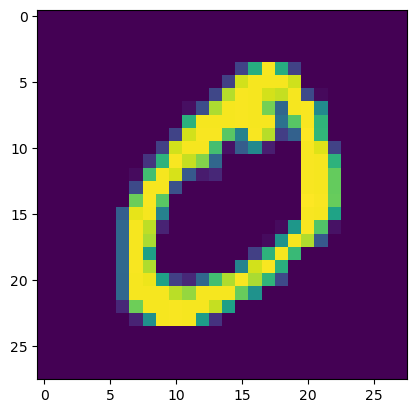

In [3]:
print("Label: ", train_labels[1])
plt.imshow(train_data[1])

In [4]:
class Model:
    def __init__(self, input_size, output_size):
        self.w = np.zeros((input_size, output_size))

    def forward(self, x):
        return np.dot(x.T, self.w)

    def backward(self, x, y, lr=1e-3):
        y_pred = self.forward(x)
        y = np.eye(10)[y].reshape((-1, 10))
        dL_dw = -2 * np.dot(x, (y - y_pred))
        self.w -= lr * dL_dw

In [5]:
model = Model(train_data[0].size, 10)

In [6]:
epochs = 10
lr = 1e-7

In [7]:
# Loss function
def loss_fn(y, y_pred):
    return (y - y_pred) ** 2

In [8]:
# Training loop
losses = []
for epoch in range(epochs):
    for i in range(len(train_labels)):
        model.backward(train_data[i].reshape(784, -1), train_labels[i], lr)

4 4


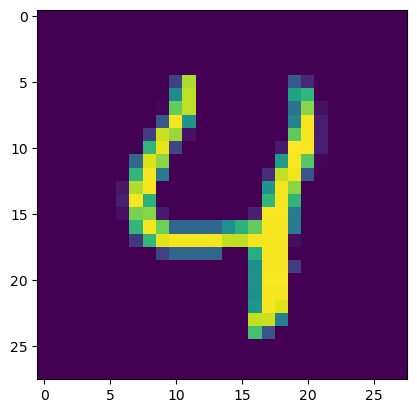

In [9]:
i = 4
print(test_labels[i], np.argmax(model.forward(test_data[i].reshape(784, -1))))
plt.imshow(test_data[i])

In [10]:
correct_predictions = 0
for i in range(len(test_labels)):
    if test_labels[i] == np.argmax(model.forward(test_data[i].reshape(784, 1))):
        correct_predictions += 1

print(correct_predictions)
print("Accuracy: ", correct_predictions / len(test_labels))

6330
Accuracy:  0.633
